# Kickstarter Projects: Success or Bust?

Kickstarter is an online platform where users can help bring “creative projects to life” by donating to projects as they wish. As of 2019, there have been 445,000 projects in categories ranging from music, video games, stage shows and technology. Kickstarter allows unique projects and personal dreams to come into fruition. However, many projects do not get completed and donors can feel like they wasted their money. 

**Objective:** Utilize past data to predict whether a Kickstarter project will meet its initial donation goal.

1. **Data Cleaning**
    * **Null values**
    * **Erroneous Values**
2. Exploratory Data Analysis
    * Visualizing dataset
    * Correlations    
3. Data Preprocessing
    * Scale numerical features
    * One-hot encode categorical features
    * train_test_split dataset    
4. Modeling
    * Decision Tree/Random Forest Classifiers
    * Gradient Boosting Classifier
    * K-Nearest Neighbors Classifier
    * Hyperparameter Tuning

This project uses the dataset from the Kaggle dataset "Kickstarter Projects" found [here.](https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv)

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

In [2]:
df = pd.read_csv('data/ks-projects-201801.csv', index_col = 'ID', parse_dates = ['deadline', 'launched'])
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
columns = df.columns
print(columns)

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


In [4]:
df.dtypes

name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [5]:
df.shape

(378661, 14)

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              378657 non-null  object        
 1   category          378661 non-null  object        
 2   main_category     378661 non-null  object        
 3   currency          378661 non-null  object        
 4   deadline          378661 non-null  datetime64[ns]
 5   goal              378661 non-null  float64       
 6   launched          378661 non-null  datetime64[ns]
 7   pledged           378661 non-null  float64       
 8   state             378661 non-null  object        
 9   backers           378661 non-null  int64         
 10  country           378661 non-null  object        
 11  usd pledged       374864 non-null  float64       
 12  usd_pledged_real  378661 non-null  float64       
 13  usd_goal_real     378661 non-null  float64     

Thankfully, most columns contain no null values except for `df['usd pledged']` and `df['name']`, however, as the name of a project shouldn't provide too much insight on the probability of success of a project, these null values will just be left the same. 

In [7]:
df[df['usd pledged'].isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997971307,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,USD,2015-02-03,7500.0,2014-12-05 04:19:14,10.00,undefined,0,"N,0""",NaN,10.00,7500.00
998319149,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,3000.0,2014-04-08 00:30:09,3102.00,undefined,0,"N,0""",NaN,2845.61,2752.04
9988744,Matthew Stephens Music,Music,Music,USD,2016-02-05,5000.0,2016-01-06 21:59:23,235.00,undefined,0,"N,0""",NaN,235.00,5000.00


Upon inspecting the rows that contain null values in `df['usd pledged']`, it seems that these values should be filled in with `0` as the number of backers in these rows are also `0` (meaning no user has donated money to these projects).

Also, it seems that these rows also contain the value `N,0"` in the `df['country']` column. An easy way to replace these values will be to use the information from `df['currency']`. If the currency is in USD, the country should be US; if the currency is AUD, the country should be Austrailia, and so forth. This will be fixed in later cells of the notebook.

### Replacing null values

In [8]:
df[df['usd pledged'].isnull()]['backers'].value_counts() # check how many of the null value rows also have 0 backers

0    3797
Name: backers, dtype: int64

In [9]:
df['usd pledged'].fillna(0, inplace = True)

### Fixing erroneous values in Country column

In [10]:
df['country'].value_counts() # all countries that are in this dataset

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [11]:
df[df['country'].str.contains('N,0')]['currency'].value_counts()

USD    2738
GBP     460
CAD     206
EUR     186
AUD     111
SEK      31
NZD      28
DKK      16
NOK      14
CHF       7
Name: currency, dtype: int64

The list above has the currencies of the rows that contain `N,0"` in the `df['country']` column. The currencies will be used to change the erroneous value to the correct country codes. 

In [12]:
fix_countries = {
    'USD': 'US',
    'GBP': 'GB',
    'CAD': 'CA',
    'AUD': 'AU',
    'SEK': 'SE',
    'NZD': 'NZ',
    'DKK': 'DK',
    'NOK': 'NO',
    'CHF': 'CH',
    'EUR': 'EU'
} 

Rows that contain 'EUR' will be switched to 'EU' simply because many countries use the Euro currency and there is no way of telling which country the project is from if the country is using Euros.

In [13]:
error_cond = df['country'] == 'N,0"'
df.loc[error_cond,'country'] = df.loc[error_cond, 'currency'].map(fix_countries)

In [14]:
df['country'].value_counts() # no longer contains 'N,0"' in the country column

US    295365
GB     34132
CA     14962
AU      7950
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1788
MX      1752
NZ      1475
DK      1129
IE       811
CH       768
NO       722
HK       618
BE       617
AT       597
SG       555
EU       186
LU        62
JP        40
Name: country, dtype: int64

### Fixing dates

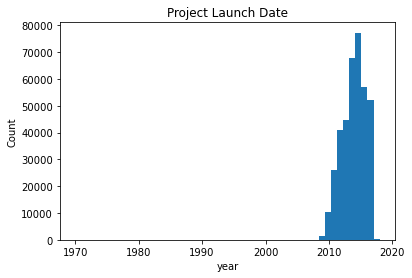

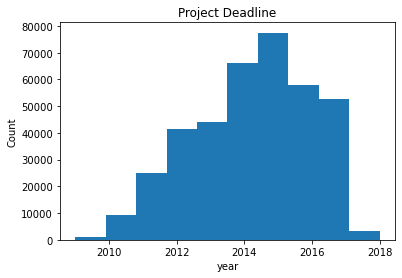

In [15]:
plt.hist(df['launched'].dt.year, bins = 50)
plt.title('Project Launch Date')
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

plt.hist(df['deadline'].dt.year)
plt.title('Project Deadline')
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

In [16]:
df.shape

(378661, 14)

In [17]:
launch_to_drop = list(df[df['launched'].dt.year < 2009].launched.index)
print(len(launch_to_drop))

7


For some reason, there were projects whose launch date was listed as before 2009. This should not be possible as Kickstarter was founded in 2009. Thankfully, there were only 7 projects that were listed with an incorrect date. There must've been an error somewhere in the storing or scraping of these projects as the dates listed are the Unix epoch time. These projects will simply be dropped from the data.

In [18]:
df.drop(launch_to_drop, inplace = True)

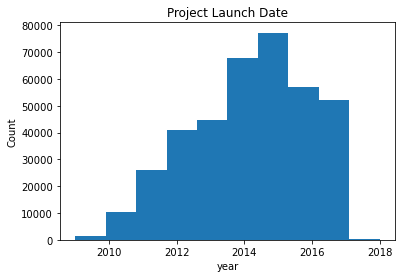

In [19]:
plt.hist(df['launched'].dt.year)
plt.title('Project Launch Date')
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

### Look for duplicate rows

In [20]:
df[df.duplicated()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,


At this point, the data is cleaned and ready for the next step of analysis (EDA).

In [21]:
df.to_csv('data/cleaned_kickstarter.csv')